<a href="https://colab.research.google.com/github/miloszpiechota/AI-Systems/blob/main/LSTM_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dane sp√≥≈Çki Apple Inc. AAPL
Te dane to historyczne notowania akcji sp√≥≈Çki Apple Inc. (AAPL). Ka≈ºdy wiersz reprezentuje dane z jednego dnia notowa≈Ñ gie≈Çdowych, a poszczeg√≥lne kolumny oznaczajƒÖ:

Date ‚Äì data notowania.

Open ‚Äì cena otwarcia akcji w danym dniu.

High ‚Äì najwy≈ºsza cena, jakƒÖ osiƒÖgnƒô≈Ça akcja w trakcie dnia.

Low ‚Äì najni≈ºsza cena, jakƒÖ osiƒÖgnƒô≈Ça akcja w trakcie dnia.

Close ‚Äì cena zamkniƒôcia akcji na koniec dnia.

Volume ‚Äì liczba akcji, kt√≥re zmieni≈Çy w≈Ça≈õciciela (wolumen obrotu).

Adj Close ‚Äì cena zamkniƒôcia skorygowana o zdarzenia takie jak dywidendy czy podzia≈Çy akcji (adjusted close).

üìå Co to jest akcja i jak dzia≈Ça?
Akcja to po prostu udzia≈Ç w firmie. Kiedy kupujesz akcjƒô, stajesz siƒô wsp√≥≈Çw≈Ça≈õcicielem tej firmy.

‚úÖ Jak zarabia siƒô na akcjach?

Cena akcji ro≈õnie ‚Üí Kupujesz taniej, sprzedajesz dro≈ºej = zysk üìàüí∞

Dywidendy ‚Üí Firma dzieli siƒô zyskami i wyp≈Çaca pieniƒÖdze akcjonariuszom (nie ka≈ºda firma to robi!)

üìå Co to sƒÖ dywidendy?
Dywidenda to czƒô≈õƒá zysku firmy, kt√≥rƒÖ firma wyp≈Çaca akcjonariuszom.

üí° Przyk≈Çad:
Masz 10 akcji firmy X, kt√≥ra wyp≈Çaca dywidendƒô 5 z≈Ç na akcjƒô.
‚û° Dostajesz 10 √ó 5 z≈Ç = 50 z≈Ç co roku (lub kwartalnie, zale≈ºy od firmy).

üîπ Nie wszystkie firmy wyp≈ÇacajƒÖ dywidendy ‚Äì niekt√≥re wolƒÖ inwestowaƒá w rozw√≥j zamiast dzieliƒá siƒô zyskami.



Akcja = udzia≈Ç w firmie

Mo≈ºesz zarabiaƒá na wzro≈õcie ceny lub dywidendach

Podzia≈Ç akcji = wiƒôcej akcji, ale ta≈Ñszych (firma nie traci na warto≈õci)

# Import Bibliotek

In [11]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
import warnings
import itertools
warnings.filterwarnings("ignore")
# from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
#from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch


# PART 1: Przygotowanie danych ‚Äì obliczanie r√≥≈ºnicowania i tworzenie kolumny Adj Close


W tej czƒô≈õci kodu dane historycznych notowa≈Ñ akcji sƒÖ wstƒôpnie przetwarzane. Z oryginalnego zestawu danych usuwane sƒÖ niepotrzebne kolumny (Open, High, Low, Volume).

 Dodana kolumna Adj Close (skorygowana cena zamkniƒôcia) jest kopiowana z kolumny Close ‚Äì ta kolumna uwzglƒôdnia ewentualne korekty wynikajƒÖce z dywidend czy podzia≈Ç√≥w akcji. Nastƒôpnie obliczana jest r√≥≈ºnica miƒôdzy kolejnymi warto≈õciami tej kolumny, a uzyskane warto≈õci NaN (wynikajƒÖce z operacji r√≥≈ºnicowania) sƒÖ uzupe≈Çniane oryginalnymi warto≈õciami, aby umo≈ºliwiƒá p√≥≈∫niejsze odwr√≥cenie transformacji przy u≈ºyciu sumy skumulowanej.

**Czym jest pandas.diff() i jak dzia≈Ça?**

Funkcja diff() oblicza r√≥≈ºnicƒô miƒôdzy bie≈ºƒÖcƒÖ warto≈õciƒÖ a warto≈õciƒÖ z okre≈õlonego kroku wstecz.

In [13]:

# Wczytujemy dane z pliku CSV (np. AAPL.csv)
data = pd.read_csv('sample_data/AAPLv2.csv')

# Wy≈õwietlamy nazwy kolumn, aby zweryfikowaƒá strukturƒô danych
print("Nazwy kolumn w oryginalnym DataFrame:", data.columns.tolist())

# Wybieramy interesujƒÖce kolumny:
# Usuwamy kolumny: 'Open', 'High', 'Low', 'Volume'
data_feature_selected = data.drop(axis=1, labels=['Open', 'High', 'Low', 'Volume'])

# Dodajemy kolumnƒô 'Adj Close' kopiujƒÖc warto≈õƒá z kolumny 'Close'
data_feature_selected['Adj Close'] = data_feature_selected['Close']

# Obliczamy r√≥≈ºnicƒô miƒôdzy kolejnymi warto≈õciami 'Adj Close'
# Funkcja diff() oblicza r√≥≈ºnicƒô miƒôdzy kolejnymi obserwacjami
data_feature_selected['differenced_trasnformation_demand'] = data_feature_selected['Adj Close'].diff().values

# Uzupe≈Çniamy warto≈õci NaN, kt√≥re powsta≈Çy po r√≥≈ºnicowaniu:
# Dla pierwszego rekordu (NaN) zastƒôpujemy oryginalnƒÖ warto≈õciƒÖ 'Adj Close'
data_feature_selected['differenced_demand_filled'] = np.where(
    pd.isnull(data_feature_selected['differenced_trasnformation_demand']),
    data_feature_selected['Adj Close'],
    data_feature_selected['differenced_trasnformation_demand']
)

# Wy≈õwietlamy kilka pierwszych wierszy, aby zweryfikowaƒá wynik operacji
print("Po differencingu i uzupe≈Çnianiu brak√≥w:")
print(data_feature_selected.head())

# Odwracamy operacjƒô r√≥≈ºnicowania przez obliczenie sumy skumulowanej
data_feature_selected['differenced_inv_transformation_demand'] = data_feature_selected['differenced_demand_filled'].cumsum()

# Testujemy, czy odwr√≥cenie operacji r√≥≈ºnicowania przywraca oryginalne warto≈õci 'Adj Close'
np.testing.assert_array_equal(
    data_feature_selected['Adj Close'].values,
    data_feature_selected['differenced_inv_transformation_demand'].values
)

# Wy≈õwietlamy DataFrame po odwr√≥ceniu transformacji
print("Po odwr√≥ceniu r√≥≈ºnicowania:")
print(data_feature_selected.head())


Nazwy kolumn w oryginalnym DataFrame: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
Po differencingu i uzupe≈Çnianiu brak√≥w:
         Date   Close  Adj Close  differenced_trasnformation_demand  \
0  2008-10-14  104.08     104.08                                NaN   
1  2008-10-13  110.26     110.26                               6.18   
2  2008-10-10   96.80      96.80                             -13.46   
3  2008-10-09   88.74      88.74                              -8.06   
4  2008-10-08   89.79      89.79                               1.05   

   differenced_demand_filled  
0                     104.08  
1                       6.18  
2                     -13.46  
3                      -8.06  
4                       1.05  
Po odwr√≥ceniu r√≥≈ºnicowania:
         Date   Close  Adj Close  differenced_trasnformation_demand  \
0  2008-10-14  104.08     104.08                                NaN   
1  2008-10-13  110.26     110.26                               6.18   

# PART: 2 Wizualizacja szeregu r√≥≈ºnicowania

**Wykres I:**

Pierwszy wykres przedstawia dwa szeregi czasowe:

Differenced Transformation: To wyniki operacji r√≥≈ºnicowania, czyli r√≥≈ºnice miƒôdzy kolejnymi warto≈õciami ceny (Adj Close). Pokazuje, jak zmienia siƒô warto≈õƒá w kolejnych dniach.

Filled Differenced Demand: To seria, w kt√≥rej warto≈õci NaN (powsta≈Çe po r√≥≈ºnicowaniu, zazwyczaj w pierwszym wierszu) zosta≈Çy uzupe≈Çnione oryginalnƒÖ warto≈õciƒÖ. Umo≈ºliwia to dalszƒÖ analizƒô bez problemu brakujƒÖcych danych.

**Wykres II:**

Drugi wykres przedstawia statystyki ruchome dla szeregu r√≥≈ºnicowania:

Szary wykres: Same warto≈õci r√≥≈ºnicowania (bez pierwszego elementu, bo jest NaN).

Pomara≈Ñczowa linia (Rolling Mean): ≈örednia ruchoma obliczona na oknie 20 obserwacji. Pozwala sprawdziƒá, czy ≈õrednia warto≈õƒá serii pozostaje wzglƒôdnie sta≈Ça w czasie.

≈ª√≥≈Çta linia (Rolling STD): Odchylenie standardowe ruchome obliczone na tym samym oknie 20 obserwacji, co pokazuje zmienno≈õƒá serii.



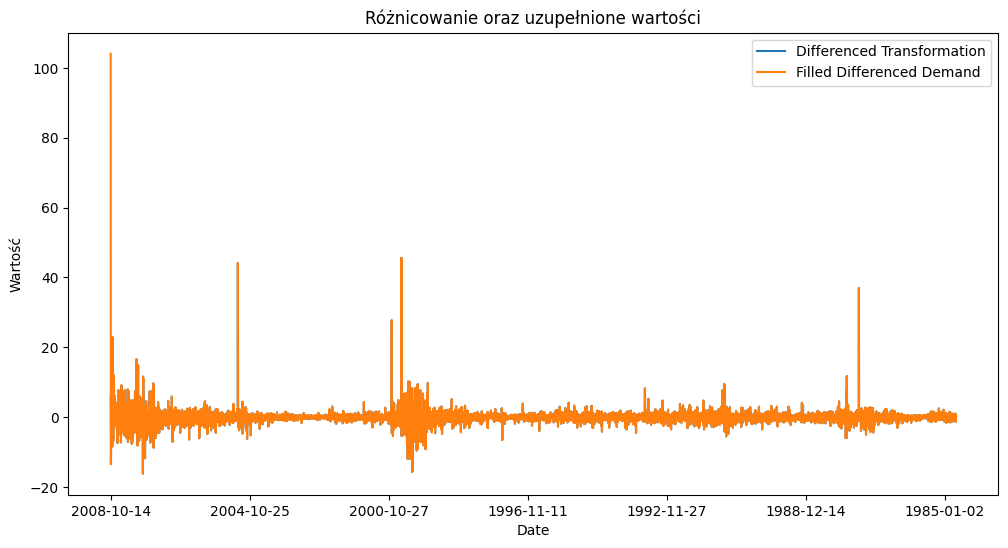

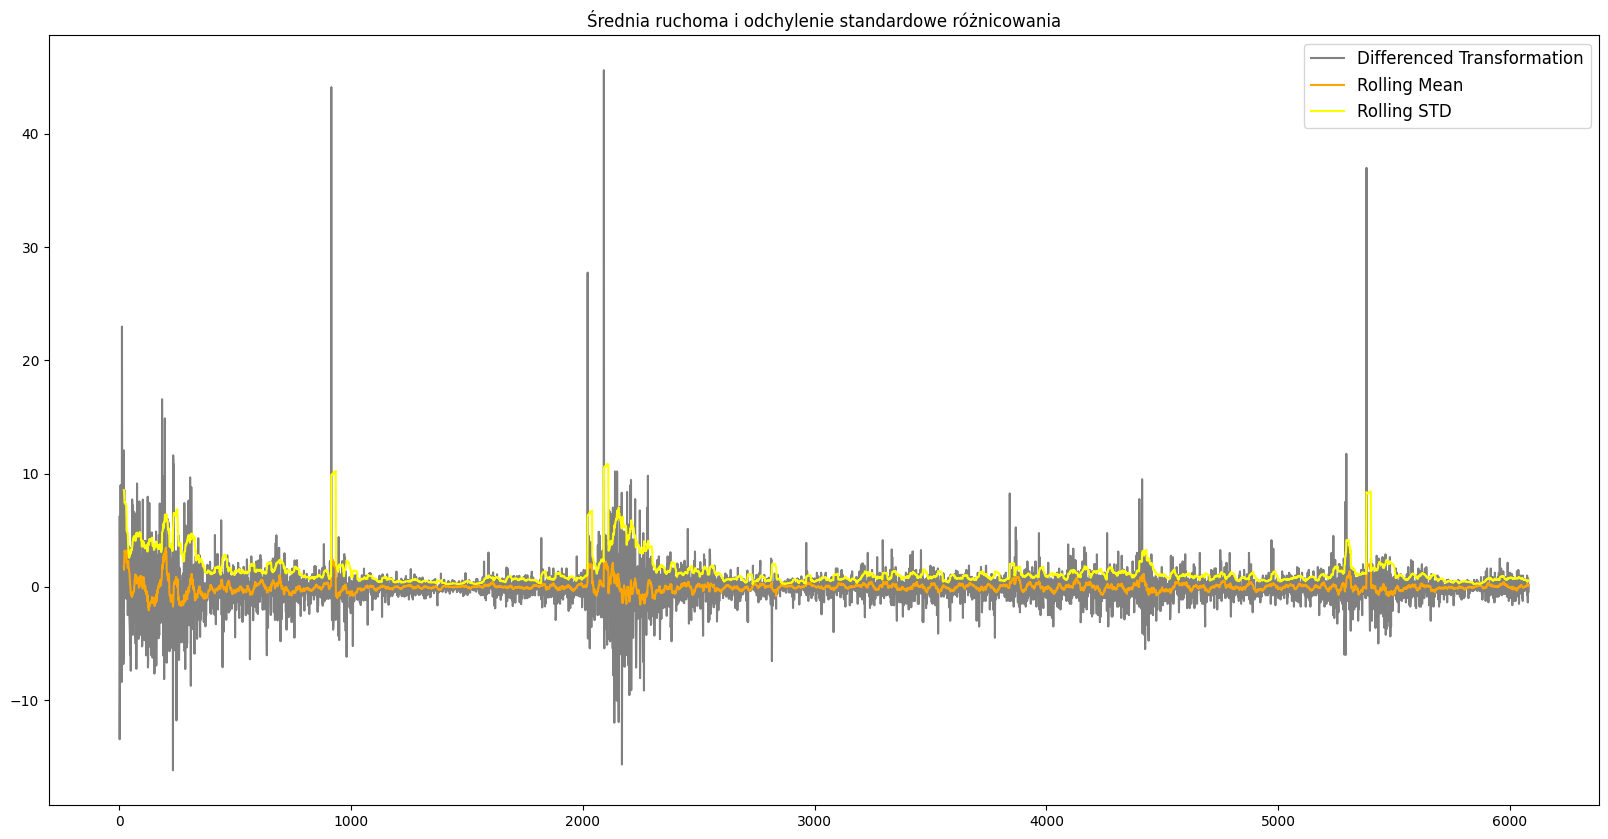

In [14]:
# Wizualizacja szeregu r√≥≈ºnicowania
plt.figure(figsize=(12, 6))
# Ustawiamy kolumnƒô 'Date' jako indeks (upewnij siƒô, ≈ºe w pliku CSV kolumna dat ma nazwƒô 'Date')
data_feature_selected.set_index('Date')['differenced_trasnformation_demand'].plot(label='Differenced Transformation')
data_feature_selected.set_index('Date')['differenced_demand_filled'].plot(label='Filled Differenced Demand')
plt.xlabel('Date')
plt.ylabel('Warto≈õƒá')
plt.title('R√≥≈ºnicowanie oraz uzupe≈Çnione warto≈õci')
plt.legend()
plt.show()

# Wizualizacja statystyk ruchomych (≈õrednia ruchoma i odchylenie standardowe)
fig, ax = plt.subplots(figsize=(20, 10))
# Pomijamy pierwszy element (NaN) i rysujemy wykres r√≥≈ºnicowania w kolorze szarym
data_feature_selected['differenced_trasnformation_demand'][1:].plot(ax=ax, color='grey', label='Differenced Transformation')
# Obliczamy i rysujemy ≈õredniƒÖ ruchomƒÖ z oknem 20
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(window=20).mean().plot(ax=ax, color='orange', label='Rolling Mean')
# Obliczamy i rysujemy odchylenie standardowe ruchome z oknem 20
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(window=20).std().plot(ax=ax, color='yellow', label='Rolling STD')
plt.legend(prop={'size': 12})
plt.title('≈örednia ruchoma i odchylenie standardowe r√≥≈ºnicowania')
plt.show()

# PART 3: Test KPSS na serii

Funkcja kpss_test wykonuje test stacjonarno≈õci (KPSS) na zadanym szeregu i wypisuje wyniki testu.

Test KPSS (Kwiatkowski-Phillips-Schmidt-Shin) s≈Çu≈ºy do sprawdzania stacjonarno≈õci szeregu czasowego. Stacjonarno≈õƒá oznacza, ≈ºe statystyczne w≈Ça≈õciwo≈õci danych (≈õrednia, wariancja i autokorelacja) nie zmieniajƒÖ siƒô w czasie. To bardzo wa≈ºna cecha przy modelowaniu szereg√≥w czasowych, poniewa≈º wiele metod analizy (np. ARIMA) wymaga, aby dane by≈Çy stacjonarne.

Co to jest stacjonarno≈õƒá?
Stacjonarno≈õƒá oznacza, ≈ºe:
* ‚úîÔ∏è ≈örednia warto≈õci w czasie jest sta≈Ça.
* ‚úîÔ∏è Wariancja (czyli rozrzut warto≈õci) nie zmienia siƒô w czasie.
* ‚úîÔ∏è Brak jest trendu (czyli nie ma d≈Çugoterminowego wzrostu ani spadku).
*‚úîÔ∏è Brak sezonowo≈õci (czyli powtarzajƒÖcych siƒô wzorc√≥w np. co miesiƒÖc czy co rok).

Przyk≈Çady:

Stacjonarny szereg czasowy ‚Äì np. losowy szum wok√≥≈Ç pewnej warto≈õci.

Niestacjonarny szereg czasowy ‚Äì np. ceny akcji, kt√≥re majƒÖ trend wzrostowy lub sezonowo≈õƒá.

Jak dzia≈Ça test KPSS?
Test KPSS sprawdza hipotezy:

Hipoteza zerowa (H‚ÇÄ): Szereg czasowy jest stacjonarny.

Hipoteza alternatywna (H‚ÇÅ): Szereg czasowy nie jest stacjonarny.

Je≈õli p-warto≈õƒá < 0.05, oznacza to, ≈ºe mo≈ºemy odrzuciƒá hipotezƒô zerowƒÖ, czyli szereg NIE jest stacjonarny.
Je≈õli p-warto≈õƒá > 0.05, nie mamy podstaw, by odrzuciƒá H‚ÇÄ, wiƒôc szereg mo≈ºe byƒá stacjonarny.

Wniosek z wynik√≥w testu KPSS
1.  Interpretacja p-warto≈õci
p-value = 0.1 (czyli wiƒôksze ni≈º 0.05)

Poniewa≈º p-warto≈õƒá jest wy≈ºsza ni≈º 0.05, nie mamy podstaw, aby odrzuciƒá hipotezƒô zerowƒÖ (H‚ÇÄ).

2. Hipoteza zerowa (H‚ÇÄ) testu KPSS
H‚ÇÄ: Szereg czasowy jest stacjonarny

H‚ÇÅ: Szereg czasowy nie jest stacjonarny

3. Krytyczne warto≈õci KPSS Statistic
KPSS Statistic = 0.0739

Wszystkie warto≈õci krytyczne (10%, 5%, 2.5%, 1%) sƒÖ du≈ºo wy≈ºsze ni≈º nasza statystyka KPSS, co oznacza, ≈ºe wynik jest daleko od granicy odrzucenia hipotezy zerowej.

4. Wniosek ko≈Ñcowy
üìå Szereg czasowy jest stacjonarny ‚Äì nie wykazuje trendu ani zmiennej wariancji w czasie.
üìå Nie musimy stosowaƒá dodatkowego r√≥≈ºnicowania, poniewa≈º dane spe≈ÇniajƒÖ warunek stacjonarno≈õci.
üìå Mo≈ºemy bezpo≈õrednio u≈ºywaƒá modeli wymagajƒÖcych stacjonarno≈õci, np. ARIMA.

In [15]:

from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):
    """
    Funkcja wykonuje test KPSS na podanym szeregu czasowym i wypisuje statystyki testu.
    """
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f' {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

# Wykonujemy test KPSS na uzupe≈Çnionej serii r√≥≈ºnicowania
kpss_test(data_feature_selected['differenced_demand_filled'])

KPSS Statistic: 0.07388885262484138
p-value: 0.1
num lags: 9
Critical Values:
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
Result: The series is stationary


<ipython-input-15-446660be0df1>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


#PART 4: Budowanie cech czasowych

Funkcja build_temporal_features konwertuje kolumnƒô Date do formatu datetime, a nastƒôpnie wyodrƒôbnia z niej cechy takie jak rok, miesiƒÖc, tydzie≈Ñ, dzie≈Ñ, dzie≈Ñ tygodnia, numer tygodnia w miesiƒÖcu oraz informacjƒô, czy dany dzie≈Ñ to weekend.

Wynikowy DataFrame jest wy≈õwietlany, aby zweryfikowaƒá poprawno≈õƒá nowych cech.

In [16]:
def build_temporal_features(data: pd.DataFrame) -> pd.DataFrame:
    """
    Funkcja przyjmuje DataFrame z kolumnƒÖ 'Date' i dodaje nowe cechy czasowe.

    Dodawane cechy:
      - date: konwersja 'Date' do formatu datetime
      - year: rok
      - month: miesiƒÖc
      - week: numer tygodnia (u≈ºywamy isocalendar().week)
      - day: dzie≈Ñ miesiƒÖca
      - dayofweek: numer dnia tygodnia (0=poniedzia≈Çek)
      - week_of_month: numer tygodnia w miesiƒÖcu (obliczany przez podzielenie dnia przez 7 i zaokrƒÖglenie w g√≥rƒô)
      - is_weekend: czy dany dzie≈Ñ to weekend (1 = tak, 0 = nie)
    """
    # Konwersja kolumny 'Date' na datetime
    data['date'] = pd.to_datetime(data['Date'])
    # Ekstrakcja cech czasowych z nowej kolumny 'date'
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    # U≈ºywamy metody isocalendar, aby uzyskaƒá numer tygodnia
    data['week'] = data['date'].dt.isocalendar().week
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek
    # Obliczamy numer tygodnia w miesiƒÖcu
    data['week_of_month'] = np.ceil(data['day'] / 7).astype(np.int8)
    # Okre≈õlamy, czy dany dzie≈Ñ jest weekendem (sobota=5, niedziela=6)
    data['is_weekend'] = (data['dayofweek'] > 4).astype(np.int8)
    return data

# Wczytujemy dane ponownie i budujemy cechy czasowe
df1 = pd.read_csv('sample_data/AAPLv2.csv')
df1 = build_temporal_features(df1)
print("Pierwsze wiersze DataFrame z cechami czasowymi:")
print(df1.head())

Pierwsze wiersze DataFrame z cechami czasowymi:
         Date    Open    High     Low   Close    Volume  Adj Close       date  \
0  2008-10-14  116.26  116.40  103.14  104.08  70749800     104.08 2008-10-14   
1  2008-10-13  104.55  110.53  101.02  110.26  54967000     110.26 2008-10-13   
2  2008-10-10   85.70  100.00   85.00   96.80  79260700      96.80 2008-10-10   
3  2008-10-09   93.35   95.80   86.60   88.74  57763700      88.74 2008-10-09   
4  2008-10-08   85.91   96.33   85.68   89.79  78847900      89.79 2008-10-08   

   year  month  week  day  dayofweek  week_of_month  is_weekend  
0  2008     10    42   14          1              2           0  
1  2008     10    42   13          0              2           0  
2  2008     10    41   10          4              2           0  
3  2008     10    41    9          3              2           0  
4  2008     10    41    8          2              2           0  


# PART 5:Model sieci neuronowej dla LSTM Long Short-Term Memory

Tworzy model sekwencyjny

LSTM (150): Warstwa z 150 neuronami do przetwarzania sekwencji danych.

Dropout (0.2): Technika zapobiegajƒÖca przeuczeniu (20% neuron√≥w jest "wy≈ÇƒÖczanych" w trakcie uczenia).

Powtarza warstwy LSTM: 4 warstwy LSTM pozwalajƒÖ lepiej analizowaƒá d≈Çugoterminowe zale≈ºno≈õci w danych.

Dense (1): Warstwa wyj≈õciowa ‚Äì model przewiduje jednƒÖ warto≈õƒá (np. przysz≈ÇƒÖ cenƒô akcji).

Kompiluje model

Loss: mean_squared_error ‚Üí Minimalizuje b≈ÇƒÖd ≈õredniokwadratowy (typowe dla regresji).

Optimizer: Adam ‚Üí Popularny algorytm do uczenia sieci neuronowych.

Wy≈õwietla podsumowanie modelu (model.summary())

Wnioski:

Model zawiera cztery warstwy LSTM + warstwƒô wyj≈õciowƒÖ (Dense).

Dodatkowo zastosowano Dropout po niekt√≥rych warstwach LSTM, co redukuje ryzyko przeuczenia.

Ca≈Çkowita liczba parametr√≥w to 633,151 ‚Äì co oznacza do≈õƒá z≈Ço≈ºony model.

Ka≈ºda warstwa LSTM ma du≈ºƒÖ liczbƒô parametr√≥w (np. 180,600), co wynika z wielu wag i stan√≥w kom√≥rkowych.

Model przyjmuje sekwencje o wymiarach (100, 1) ‚Äì czyli 100 krok√≥w czasowych z 1 cechƒÖ na ka≈ºdy krok.

Po ostatniej warstwie LSTM wynik ma kszta≈Çt (150,), czyli reprezentacjƒô cech.

Warstwa wyj≈õciowa (Dense) przekszta≈Çca to na (1,) ‚Äì czyli jednƒÖ przewidywanƒÖ warto≈õƒá (np. cena akcji).

Je≈õli zar√≥wno loss (strata na zbiorze treningowym), jak i val_loss (strata na zbiorze walidacyjnym) systematycznie spadajƒÖ, oznacza to, ≈ºe model dobrze siƒô uczy i minimalizuje b≈ÇƒÖd predykcji.

Je≈õli loss jest bardzo niska, ale val_loss przestaje spadaƒá lub zaczyna rosnƒÖƒá po pewnym czasie, oznacza to, ≈ºe model zapamiƒôtuje dane treningowe, ale nie generalizuje dobrze na nowe dane.

Je≈õli zar√≥wno loss, jak i val_loss sƒÖ bardzo wysokie i nie spadajƒÖ znaczƒÖco, oznacza to, ≈ºe model nie uczy siƒô dobrze. Mo≈ºliwe rozwiƒÖzania:

Zwiƒôkszenie liczby epok (epochs)

U≈ºycie bardziej skomplikowanego modelu

Dostosowanie parametr√≥w optymalizatora (np. zmiana learning rate)

Je≈õli loss i val_loss oscylujƒÖ bez wyra≈∫nego trendu spadkowego, mo≈ºe to oznaczaƒá, ≈ºe model ma trudno≈õci z konwergencjƒÖ (np. zbyt du≈ºy learning rate).

Je≈õli val_loss jest niestabilny (np. gwa≈Çtownie ro≈õnie i spada), oznacza to, ≈ºe model jest wra≈ºliwy na dane walidacyjne

Wykres przedstawia stratƒô modelu LSTM podczas treningu i walidacji w funkcji liczby epok.

Na poczƒÖtku warto≈õci loss (straty) i validation loss sƒÖ stosunkowo wysokie, ale szybko malejƒÖ w pierwszych epokach.

Oznacza to, ≈ºe model skutecznie siƒô uczy i poprawia swoje prognozy.

Validation Loss (strata na zbiorze walidacyjnym) i Loss (strata na zbiorze treningowym) sƒÖ blisko siebie przez ca≈Çy czas trwania treningu.

Brak gwa≈Çtownego wzrostu straty walidacyjnej oznacza, ≈ºe model nie przeuczy≈Ç siƒô na danych treningowych.
Po oko≈Ço 20 epokach zar√≥wno loss, jak i validation loss osiƒÖgajƒÖ stabilny poziom.

Model prawdopodobnie nie uczy siƒô ju≈º du≈ºo wiƒôcej i dalsze epoki mogƒÖ nie przynosiƒá znaczƒÖcych korzy≈õci.

Mo≈ºna by≈Ço spr√≥bowaƒá zatrzymaƒá trening wcze≈õniej, np. przy epokach 30-35, aby zaoszczƒôdziƒá czas oblicze≈Ñ.

Brak du≈ºych r√≥≈ºnic miƒôdzy krzywymi oznacza, ≈ºe model jest dobrze dopasowany i nie cierpi na nadmierne dopasowanie (overfitting) lub niedouczenie (underfitting).

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ lstm (LSTM)                          ‚îÇ (None, 100, 150)            ‚îÇ          91,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 100, 150)            ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_1 (LSTM)                        ‚îÇ (None, 100, 150)            ‚îÇ         180,600 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_2 (LSTM)                        ‚îÇ (None, 100, 150)            ‚îÇ         180,600 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)                  ‚îÇ (None, 100, 150)            ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_3 (LSTM)                        ‚îÇ (None, 150)                 ‚îÇ         180,600 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)                  ‚îÇ (None, 150)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 1)                   ‚îÇ             151 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 633,151 (2.42 MB)

 Trainable params: 633,151 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 28ms/step - loss: 0.0064 - val_loss: 0.0012
Epoch 2/100
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 24ms/step - loss: 0.0014 - val_loss: 5.4090e-04
Epoch 3/100
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 21ms/step - loss: 0.0012 - val_loss: 5.2927e-04
Epoch 4/100
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 22ms/step - loss: 7.7418e-04 - val_loss: 4.0358e-04
Epoch 5/100
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 26ms/step - loss: 8.4372e-04 - val_loss: 3.1186e-04
Epoch 6/100
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 23ms/step - loss: 6.8092e-04 - val_loss: 3.0454e-04
Epoch 7/100
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 22ms/step - loss: 6.2419e-04 - val_loss: 2.1751e-04
Epoch 8/100
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

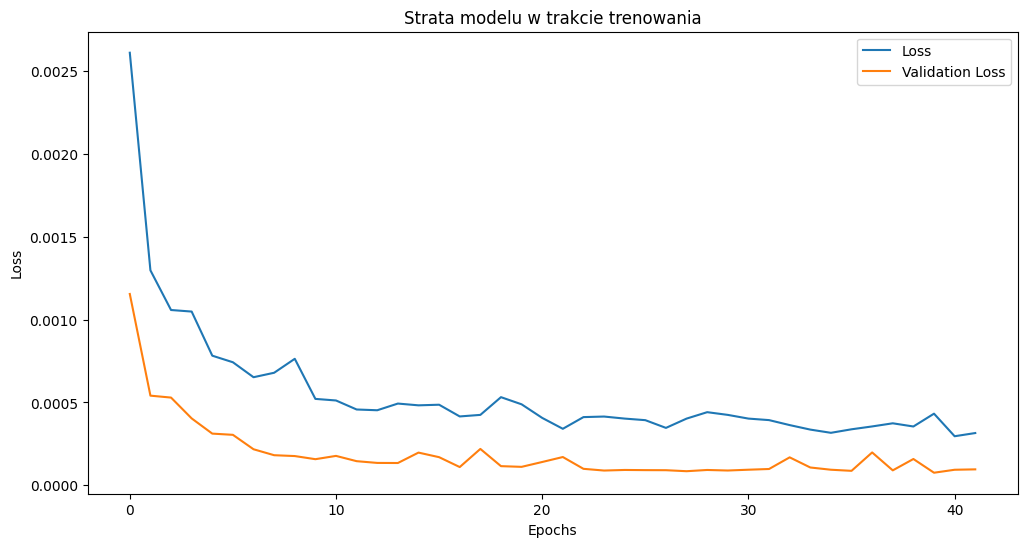

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Za≈Çaduj dane (zamie≈Ñ 'AAPL.csv' na rzeczywistƒÖ ≈õcie≈ºkƒô pliku)
data = pd.read_csv('sample_data/AAPLv2.csv')

# Konwersja kolumny 'Date' na format daty i ustawienie jako indeks
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Wyb√≥r kolumny 'Close' jako warto≈õci do przewidywania
closing_prices = data[['Close']].values

# Normalizacja danych (skalowanie do zakresu 0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# Tworzenie sekwencji dla LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Definiowanie d≈Çugo≈õci sekwencji (np. 100 dni)
seq_length = 100
X, y = create_sequences(closing_prices_scaled, seq_length)

# Podzia≈Ç danych na zbi√≥r treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Tworzenie modelu LSTM
model = Sequential()

# Pierwsza warstwa LSTM
model.add(LSTM(150, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))  # Dropout (20%) zapobiega przeuczeniu

# Druga warstwa LSTM
model.add(LSTM(150, return_sequences=True))

# Trzecia warstwa LSTM
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))  # Dropout dla lepszej generalizacji

# Czwarta warstwa LSTM (ostatnia warstwa ukryta)
model.add(LSTM(150))
model.add(Dropout(0.2))  # Dropout (20%)

# Warstwa wyj≈õciowa - zwraca jednƒÖ przewidywanƒÖ warto≈õƒá
model.add(Dense(1))

# Kompilacja modelu
model.compile(loss='mean_squared_error', optimizer='adam')

# Wy≈õwietlenie podsumowania modelu
model.summary()

# Wczesne zatrzymanie treningu w przypadku braku poprawy
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30,
                        verbose=1, mode='auto', restore_best_weights=True)

# Trenowanie modelu
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, callbacks=[monitor], verbose=1)

# Wizualizacja przebiegu uczenia
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Strata modelu w trakcie trenowania')
plt.legend()
plt.show()


# Part 6: Prognozy cen akcji Apple

Przewidywanie wartosci na zbiorze treningowym i testowym

üßê Co mo≈ºna odczytaƒá z tego wykresu?
Jak dobrze model przewiduje rzeczywiste ceny

Je≈õli Train Predict dobrze pokrywa siƒô z Real Apple Stock Price, to model dobrze nauczy≈Ç siƒô na danych treningowych.

Je≈õli Test Predict jest blisko rzeczywistych warto≈õci, to model dobrze generalizuje na nowe dane.

Czy model siƒô przeuczy≈Ç (overfitting)

Je≈õli Train Predict dok≈Çadnie odwzorowuje dane, ale Test Predict odbiega od rzeczywistych warto≈õci, to model m√≥g≈Ç siƒô przeuczyƒá.

Czy model ma przesuniƒôcie czasowe (lag)

Je≈õli Test Predict wyglƒÖda podobnie do Real Apple Stock Price, ale jest przesuniƒôty w czasie, to model mo≈ºe mieƒá problem z dostosowaniem do aktualnych warto≈õci.


Zielona linia ‚Äì rzeczywista cena akcji Apple.

Czerwona linia ‚Äì predykcja modelu na zbiorze treningowym.

Niebieska linia ‚Äì predykcja modelu na zbiorze testowym.

Model dobrze odwzorowuje rzeczywiste ceny w fazie treningowej.

Czasami przewiduje wiƒôksze skoki ni≈º rzeczywiste ceny (nadmierna reakcja).

Model w miarƒô poprawnie podƒÖ≈ºa za trendem rzeczywistych danych.

Jednak wystƒôpujƒÖ pewne rozbie≈ºno≈õci ‚Äì zw≈Çaszcza przy du≈ºych zmianach cen.

Model LSTM ma trudno≈õƒá w przewidywaniu niespodziewanych skok√≥w i spadk√≥w.

Widaƒá to w okresach, gdzie ceny akcji gwa≈Çtownie rosnƒÖ lub spadajƒÖ ‚Äì model czƒôsto reaguje op√≥≈∫nieniem.

‚úÖ Dodanie cech wej≈õciowych ‚Äì np. wska≈∫nik√≥w technicznych (RSI, MACD) lub informacji o rynku.
‚úÖ Wypr√≥bowanie innych modeli ‚Äì np. GRU, Transformer√≥w lub hybrydowego podej≈õcia.
‚úÖ Lepsza normalizacja danych ‚Äì sprawdzenie wp≈Çywu r√≥≈ºnych skalowa≈Ñ danych.
‚úÖ Wiƒôksza ilo≈õƒá danych ‚Äì zw≈Çaszcza w zakresie nag≈Çych zmian cen.

üí° Podsumowanie:
Model LSTM ca≈Çkiem nie≈∫le przewiduje trend cen akcji Apple, ale ma problem z gwa≈Çtownymi zmianami. Mo≈ºna go ulepszyƒá poprzez dodanie dodatkowych cech lub tuning hiperparametr√≥w. üöÄ




150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 7ms/step


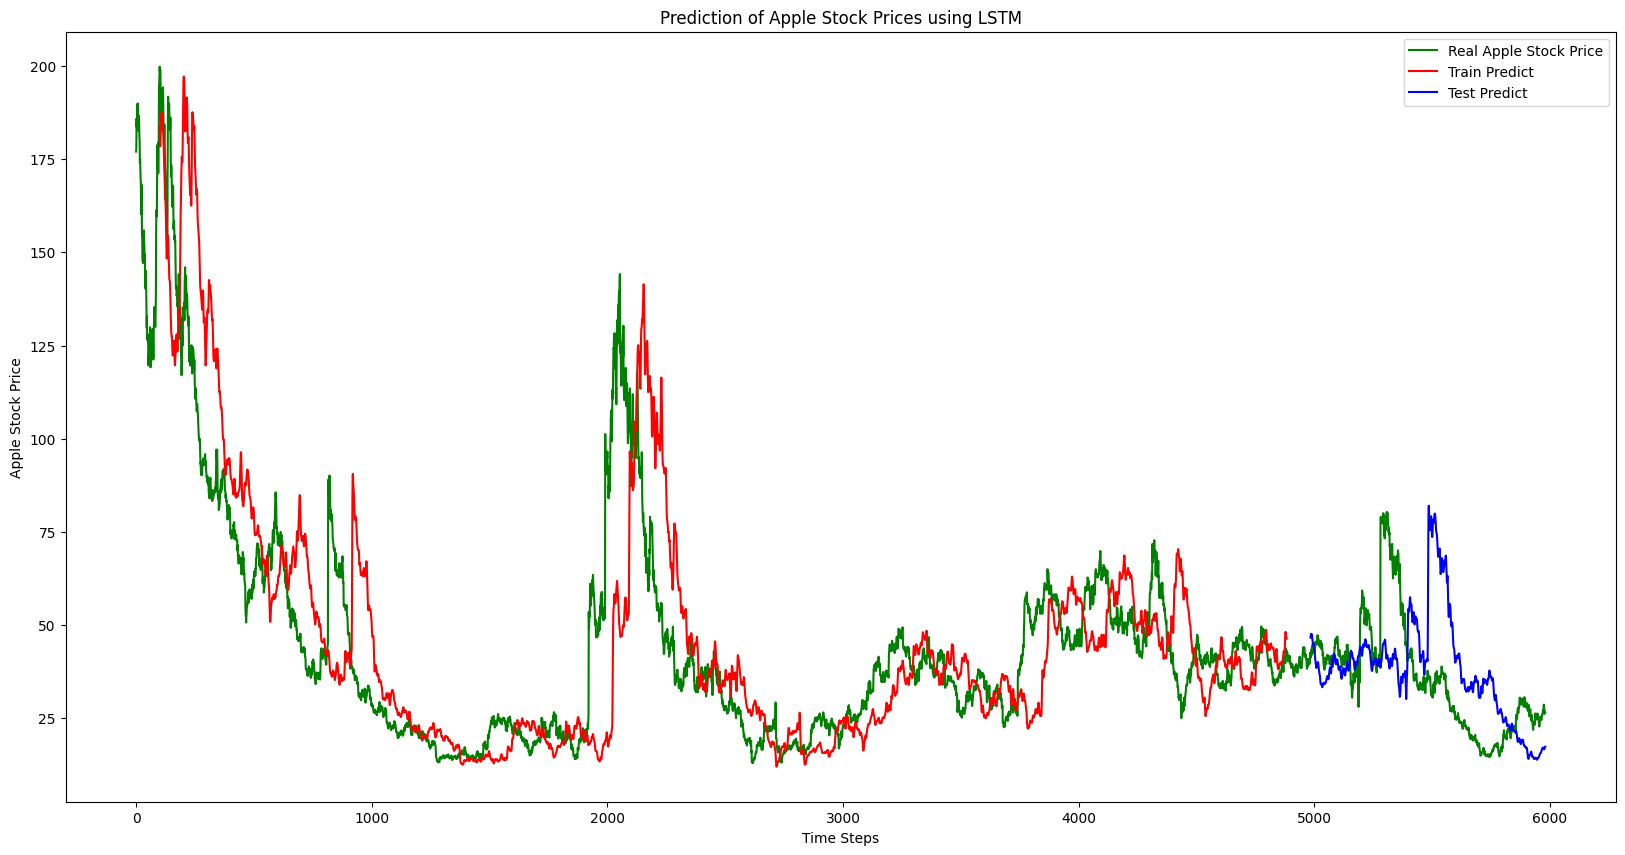

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Wczytanie danych
data = pd.read_csv('sample_data/AAPLv2.csv')

# Konwersja kolumny 'Date' na format datetime i ustawienie jako indeks
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Pobranie warto≈õci zamkniƒôcia (Close) do analizy
closing_prices = data[['Close']].values

# Zak≈Çadam, ≈ºe 'closing_prices' zawiera dane o cenach akcji
train_size = int(len(closing_prices) * 0.8)  # 80% na trening, 20% na test
train_data = closing_prices[:train_size]  # Dane treningowe
test_data = closing_prices[train_size:]   # Dane testowe

# Przewidywanie warto≈õci dla zbioru treningowego i testowego
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Przywracanie rzeczywistych warto≈õci poprzez odwrotne skalowanie
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_actual = scaler.inverse_transform(y)  # Oryginalne ceny

# Ustawienie liczby krok√≥w do przewidywania
look_back = seq_length

# Tworzenie pustej macierzy dla wykresu przewidywa≈Ñ na zbiorze treningowym
trainPredictPlot = np.empty_like(y_actual)
trainPredictPlot[:, :] = np.nan  # Wype≈Çnienie warto≈õciami NaN
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Tworzenie pustej macierzy dla wykresu przewidywa≈Ñ na zbiorze testowym
testPredictPlot = np.empty_like(y_actual)
testPredictPlot[:, :] = np.nan  # Wype≈Çnienie warto≈õciami NaN

# Obliczenie poprawnych indeks√≥w do przypisania test_predict
start_idx = len(train_predict) + (look_back * 2)
end_idx = start_idx + len(test_predict)

# Zapewnienie, ≈ºe indeksy nie wychodzƒÖ poza zakres
if end_idx > len(testPredictPlot):
    end_idx = len(testPredictPlot)

# Przypisanie testowych przewidywa≈Ñ do wykresu
testPredictPlot[start_idx:end_idx, :] = test_predict[:end_idx - start_idx]

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(20, 10))

# Rysowanie rzeczywistych warto≈õci cen akcji
plt.plot(y_actual, label="Real Apple Stock Price", color="green")

# Rysowanie przewidywa≈Ñ dla zbioru treningowego
plt.plot(trainPredictPlot, label="Train Predict", color="red")

# Rysowanie przewidywa≈Ñ dla zbioru testowego
plt.plot(testPredictPlot, label="Test Predict", color="blue")

# Dodanie legendy i opis√≥w
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Apple Stock Price')
plt.title('Prediction of Apple Stock Prices using LSTM')

# Wy≈õwietlenie wykresu
plt.show()


#Part 7: Predykcja w przysz≈Çosci
‚úÖ ≈Åaduje i przygotowuje dane ‚Äì wczytuje ceny akcji Apple, normalizuje i dzieli na zbi√≥r treningowy oraz testowy.
‚úÖ Tworzy wej≈õcie dla modelu ‚Äì pobiera ostatnie 100 warto≈õci i u≈ºywa ich do predykcji.
‚úÖ Generuje predykcje ‚Äì przewiduje kolejne 30 dni na podstawie wcze≈õniejszych cen.
‚úÖ Rysuje wykres ‚Äì pokazuje rzeczywiste ceny akcji, dane testowe oraz przysz≈ÇƒÖ predykcjƒô.


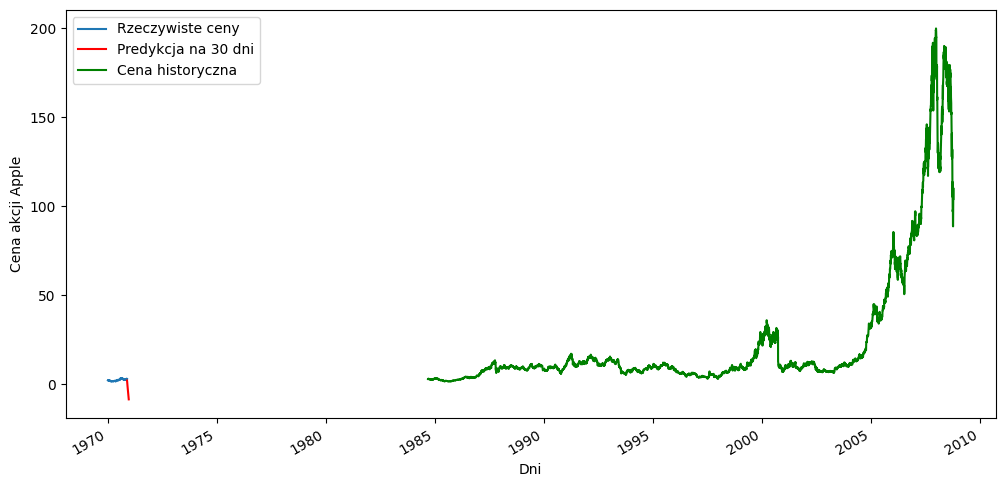

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Za≈Çaduj dane historyczne akcji
df1 = pd.read_csv('sample_data/AAPLv2.csv')  # Upewnij siƒô, ≈ºe plik jest dostƒôpny
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

# Podzia≈Ç na dane treningowe i testowe
train_data = df1.iloc[:2880]  # Zak≈Çadamy, ≈ºe pierwsze 2880 pr√≥bek to trening
test_data = df1.iloc[2880:]  # Pozosta≈Çe to test

# Normalizacja danych
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train_data[['Adj Close']])
test_scaled = scaler.transform(test_data[['Adj Close']])

# Przekszta≈Çcenie danych testowych dla modelu
x_input = test_scaled[943:].reshape(1,-1)  # Wej≈õcie modelu z ko≈Ñcowych danych testowych
temp_input = list(x_input.flatten())  # Konwersja do listy

# Predykcja przysz≈Çych warto≈õci (np. na kolejne 30 dni)
n_future = 30  # Liczba dni do przewidzenia
lst_output = []

for i in range(n_future):
    x_input = np.array(temp_input[-100:]).reshape(1,-1)  # Pobranie ostatnich 100 warto≈õci
    x_input = x_input.reshape((1, 100, 1))  # Dopasowanie kszta≈Çtu do wej≈õcia LSTM

    y_pred = model.predict(x_input, verbose=0)  # Predykcja pojedynczej warto≈õci
    temp_input.append(y_pred[0][0])  # Dodanie wyniku do listy
    lst_output.append(y_pred[0][0])  # Zapisanie do wynik√≥w

# Odwr√≥cenie normalizacji wynik√≥w
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1,1))

# Wizualizacja predykcji
day_new = np.arange(1, len(test_data[2880:]) + 1)  # Dni w testowym zbiorze
day_pred = np.arange(len(test_data[2880:]), len(test_data[2880:]) + n_future)  # Dni przysz≈Çe

plt.figure(figsize=(12,6))
plt.plot(day_new, scaler.inverse_transform(test_scaled[2880:]), label="Rzeczywiste ceny")
plt.plot(day_pred, lst_output, label="Predykcja na 30 dni", color='red')
df1['Adj Close'].plot(label="Cena historyczna", color='green')

plt.xlabel("Dni")
plt.ylabel("Cena akcji Apple")
plt.legend()
plt.show()


# Part 8: Kolejne predykcje w przysz≈Ço≈õci
wykres przedstawia por√≥wnanie rzeczywistych cen akcji (niebieska linia) oraz prognozowanych warto≈õci przez model (czerwona linia). Dodatkowo zaznaczono anomalie (zielone kropki).

Dok≈Çadno≈õƒá predykcji ‚Äì Model bardzo dobrze dopasowuje siƒô do rzeczywistych warto≈õci, zw≈Çaszcza w p√≥≈∫niejszych okresach (wiƒôkszo≈õƒá niebieskiej i czerwonej linii siƒô pokrywa).

Anomalie ‚Äì Zielone kropki na poczƒÖtku wykresu wskazujƒÖ momenty, gdzie przewidywania modelu znaczƒÖco odbiega≈Çy od rzeczywisto≈õci. Mo≈ºe to wynikaƒá z:

nag≈Çych skok√≥w cen, kt√≥re model nie przewidzia≈Ç,

b≈Çƒôd√≥w w danych wej≈õciowych,

braku wystarczajƒÖcej ilo≈õci danych do dok≈Çadnego przewidywania w tym okresie.

Stabilno≈õƒá predykcji ‚Äì Po poczƒÖtkowych anomaliach model wydaje siƒô coraz lepiej odzwierciedlaƒá rzeczywiste warto≈õci, co sugeruje, ≈ºe dobrze nauczy≈Ç siƒô wzorc√≥w cenowych.

Silny trend wzrostowy i spadkowy ‚Äì W ≈õrodkowej czƒô≈õci wykresu widaƒá wyra≈∫ny skok cen, kt√≥ry model poprawnie odwzorowa≈Ç.

38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step
Typ predictions: <class 'numpy.ndarray'>, rozmiar: 1197
Typ ytest: <class 'numpy.ndarray'>, rozmiar: 1197
Typ outliers: <class 'pandas.core.series.Series'>, rozmiar: Nieznany


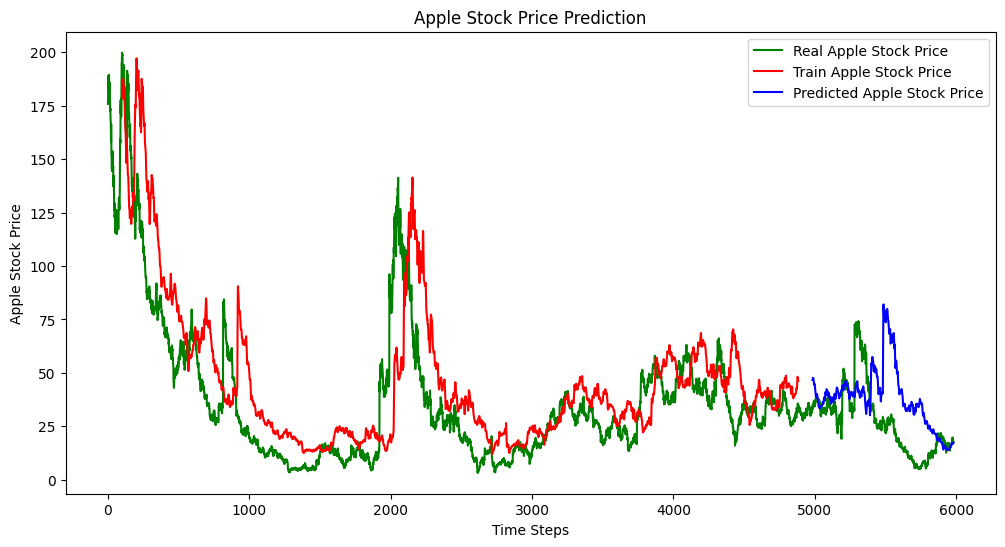

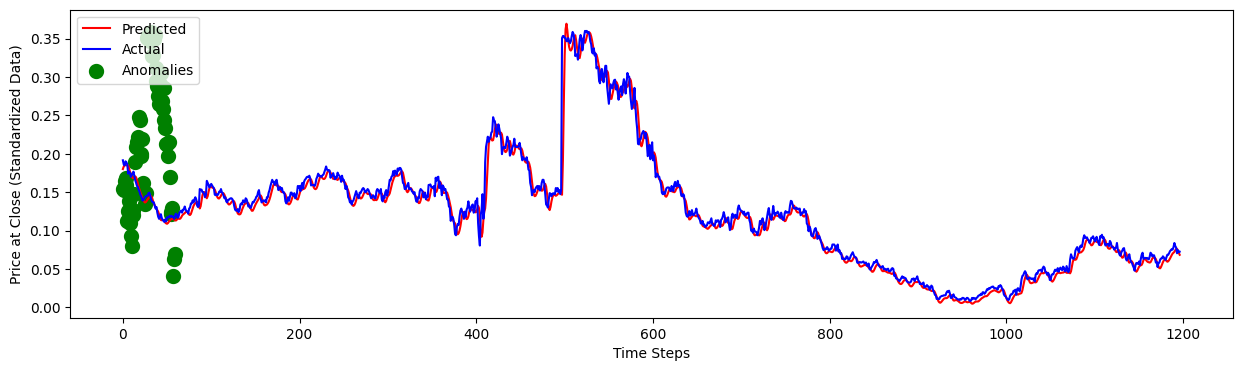

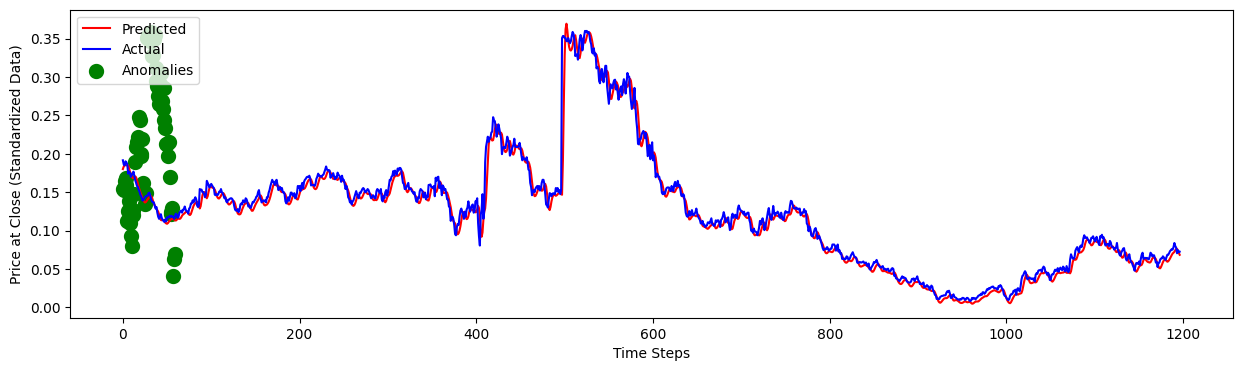

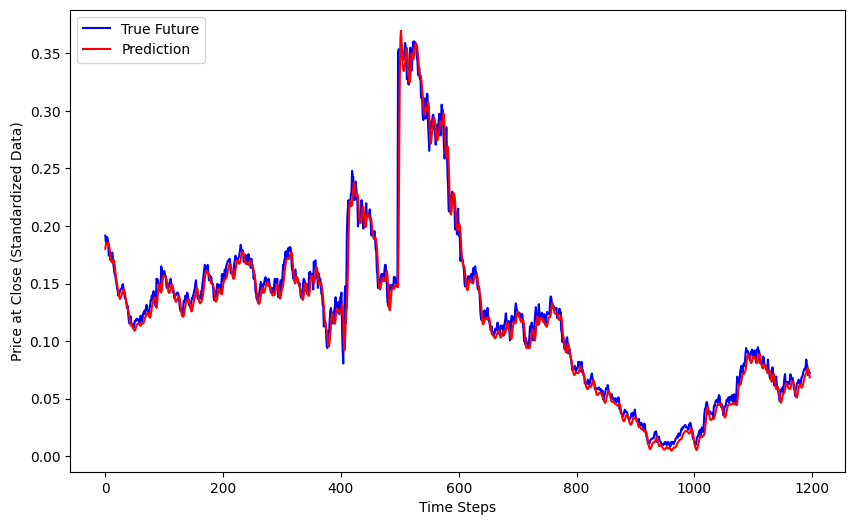

In [24]:
import numpy as np
import matplotlib.pyplot as plt
# Je≈õli nie masz jeszcze predictions, mo≈ºesz je stworzyƒá np. w ten spos√≥b:
predictions = model.predict(X_test)  # Model zwraca przewidywane warto≈õci
ytest = y_test  # Zak≈ÇadajƒÖc, ≈ºe masz rzeczywiste warto≈õci cen testowych

# Outliers (anomalii) mo≈ºna wykryƒá np. jako punkty o du≈ºej r√≥≈ºnicy miƒôdzy rzeczywisto≈õciƒÖ a predykcjƒÖ
import pandas as pd
errors = np.abs(ytest - predictions)  # B≈ÇƒÖd bezwzglƒôdny
threshold = np.percentile(errors, 95)  # Pr√≥g np. 95 percentyl
outliers = pd.Series(ytest[errors > threshold])  # Wyb√≥r warto≈õci odstajƒÖcych

print(f"Typ predictions: {type(predictions)}, rozmiar: {len(predictions) if isinstance(predictions, (list, np.ndarray)) else 'Nieznany'}")
print(f"Typ ytest: {type(ytest)}, rozmiar: {len(ytest) if isinstance(ytest, (list, np.ndarray)) else 'Nieznany'}")
print(f"Typ outliers: {type(outliers)}, rozmiar: {len(outliers) if isinstance(outliers, (list, np.ndarray)) else 'Nieznany'}")

# Wizualizacja wynik√≥w predykcji
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y), color='green', label='Real Apple Stock Price')
plt.plot(trainPredictPlot, color='red', label='Train Apple Stock Price')
plt.plot(testPredictPlot, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

# Tworzenie subplots dla predykcji vs rzeczywiste warto≈õci
fig, axs = plt.subplots(figsize=(15, 4))
axs.plot(predictions, color='red', label='Predicted')
axs.plot(ytest, color='blue', label='Actual')
axs.scatter(outliers.index, outliers, color='green', linewidth=5.0, label='Anomalies')
axs.set_xlabel('Time Steps')
axs.set_ylabel('Price at Close (Standardized Data)')
axs.legend(loc='upper left')
plt.show()

# Kolejny wykres predykcji vs rzeczywiste warto≈õci
fig, axs = plt.subplots(figsize=(15, 4))
axs.plot(predictions, color='red', label='Predicted')
axs.plot(ytest, color='blue', label='Actual')
axs.scatter(outliers.index, outliers, color='green', linewidth=5.0, label='Anomalies')
axs.set_xlabel('Time Steps')
axs.set_ylabel('Price at Close (Standardized Data)')
axs.legend(loc='upper left')
plt.show()

# Wizualizacja przysz≈Çych warto≈õci vs rzeczywiste dane
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), label='True Future', color='blue')
plt.plot(np.arange(range_future), np.array(predictions), label='Prediction', color='red')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()


Podaj rok do przewidzenia ceny akcji: 2025
Brak prognoz dla roku 2025. Spr√≥buj wcze≈õniejszƒÖ datƒô.


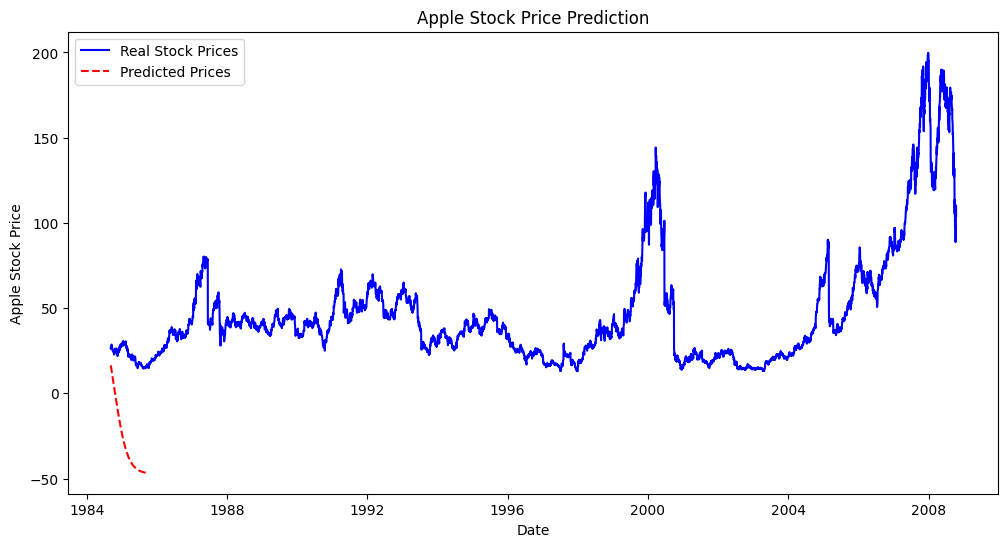

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Ustawienie liczby dni do przewidywania
future_days = 365  # Mo≈ºemy przewidzieƒá 1 rok do przodu

# Pobranie ostatnich warto≈õci do prognozy
x_input = closing_prices_scaled[-seq_length:].reshape(1, -1, 1)

# Tworzenie pustej listy na przewidywane warto≈õci
lst_output = []

for i in range(future_days):
    prediction = model.predict(x_input, verbose=0)  # Prognoza modelu
    lst_output.append(prediction[0, 0])  # Dodanie wyniku do listy
    x_input = np.append(x_input[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)  # Aktualizacja wej≈õcia

# Odwr√≥cenie skalowania
predicted_prices = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

# Generowanie osi czasu dla prognozy
last_date = data.index[-1]  # Ostatnia data w danych
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_days + 1)]

# Tworzenie DataFrame z prognozami
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': predicted_prices.flatten()})
future_df.set_index('Date', inplace=True)

# Funkcja do zwracania prognozy dla podanego roku
def get_prediction_for_year(year):
    year = int(year)  # Konwersja na liczbƒô ca≈ÇkowitƒÖ
    filtered_df = future_df[future_df.index.year == year]  # Filtrujemy dane dla danego roku
    if filtered_df.empty:
        return f"Brak prognoz dla roku {year}. Spr√≥buj wcze≈õniejszƒÖ datƒô."
    return filtered_df

# Pobranie roku od u≈ºytkownika
year_input = input("Podaj rok do przewidzenia ceny akcji: ")
result = get_prediction_for_year(year_input)
print(result)

# Wizualizacja prognozy
plt.figure(figsize=(12, 6))
plt.plot(data.index, closing_prices, label='Real Stock Prices', color='blue')
plt.plot(future_df.index, future_df['Predicted Close'], label='Predicted Prices', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()
